In [29]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import json

In [22]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select_all_company(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM main.company")

    rows = cur.fetchall()
    return rows

def select_all_news_meta(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM main.news_meta")

    rows = cur.fetchall()
    return rows

In [24]:
database = '/Users/kleomeniskogias/DataspellProjects/Mycodes/9Fin/Data/db.sqlite3'
conn = create_connection(database)

In [ ]:
companies = select_all_company(conn)
news_meta = select_all_news_meta(conn)

In [ ]:
companies_df = pd.DataFrame(companies, columns = ['id', 'name', 'description', 'location', 'website'])
news_meta_df = pd.DataFrame(news_meta, columns = ['id', 'url', 'published_at', 'company_id', 'label'])

In [30]:
with open('/Users/kleomeniskogias/DataspellProjects/Mycodes/9Fin/Data/titles.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [43]:
json_df = pd.DataFrame(columns = ['title', 'id'])
for json_str in json_list:
    result = json.loads(json_str)
    json_df = json_df.append(result, ignore_index=True)

/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [50]:
print(companies_df.shape, news_meta_df.shape, json_df.shape)

(561, 5) (859, 5) (859, 2)


In [47]:
companies_df.head()

,id,name,description,location,website
0,2236,Diversified Healthcare Trust,Healthcare Real Estate Investment Trust,United States,https://www.dhcreit.com/home/default.aspx
1,2748,Nathan's Famous,Operates a chain of fast food restaurants,United States,https://www.nathansfamous.com/
2,663,Dufry,Travel retailer,Switzerland,http://www.dufry.com/
3,1169,Ocado Ltd.,Online supermarket,United Kingdom,https://www.ocado.com/
4,1924,Adler Group,Owns a portfolio of commercial and residential...,Germany,https://www.ado.properties/websites/ado/Englis...


In [69]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           561 non-null    int64 
 1   name         561 non-null    object
 2   description  561 non-null    object
 3   location     561 non-null    object
 4   website      561 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.0+ KB


In [67]:
# Missing values
for col in companies_df.columns:
    print(col)
    print(companies_df[companies_df[col] == ''].shape[0])

id
0
name
0
description
0
location
2
website
1


In [68]:
companies_df['location'].value_counts()

United States           235
United Kingdom           71
Germany                  34
France                   29
Italy                    21
Spain                    20
Sweden                   17
Canada                   12
Netherlands              11
Switzerland              11
Norway                   10
Greece                    9
Ireland                   9
Finland                   8
Belgium                   8
Luxembourg                7
Denmark                   4
Australia                 4
India                     3
China                     2
                          2
Mexico                    2
Romania                   2
Singapore                 2
Nigeria                   2
South Africa              2
Poland                    2
Isle of Man               2
Russia                    2
Czech Republic            1
Serbia                    1
Monaco                    1
Slovenia                  1
Ukraine                   1
Turkey                    1
Malta               

In [71]:
# Check that each company is found once - however we might have the same company twice with slightly differentiated names
companies_df['name'].value_counts().max()

1

In [ ]:
# Checks
# 1. That we do not have the same company twice, with slightly differentiated name
# 2. That we do not have any missing values

In [51]:
news_meta_df.head()

,id,url,published_at,company_id,label
0,1b26de1d-0c7e-49c2-94d7-2db9d187aaed,https://www.dhcreit.com/news/press-release-det...,2021-04-08 12:01:45.346207,2236,CALENDAR
1,fdd95479-f76f-41e3-92f7-f9fcaa025931,https://nathansfamous.gcs-web.com/news-release...,2021-11-05 12:34:06.248918,2748,RESULTS
2,d3207342-6972-4ec9-97f3-a4c5e3511ecf,https://www.dufry.com/en/press_release/2021-06...,2021-06-10 05:04:55.296493,663,PRESS RELEASE
3,b3b6f4b8-1a67-4efe-af51-a43aed8dc1b2,http://www.londonstockexchange.com/exchange/ne...,2018-12-13 07:02:16.113445,1169,RESULTS
4,bc09685e-1b3a-4afa-b9c7-c210c35babbc,https://twitter.com/JackSidders/status/1456301...,2021-11-04 17:29:14.640525,1924,PRESS RELEASE


In [73]:
news_meta_df['published_at_month'] = news_meta_df['published_at'].apply(lambda x : x[0:7])

In [75]:
headlines_per_month  = news_meta_df.groupby(['published_at_month'])['id'].count().sort_values()

<AxesSubplot:xlabel='published_at_month'>

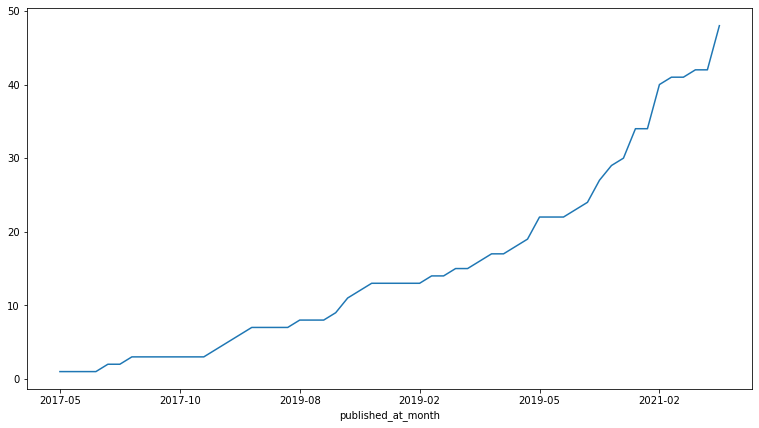

In [77]:
headlines_per_month.plot(figsize = (13,7))

In [45]:
json_df.head()

,title,id
0,Diversified Healthcare Trust: Diversified Heal...,1b26de1d-0c7e-49c2-94d7-2db9d187aaed
1,"Nathan's Famous: Nathan's Famous, Inc. Reports...",fdd95479-f76f-41e3-92f7-f9fcaa025931
2,"Dufry: Dufry wins new, ten-year duty-free cont...",d3207342-6972-4ec9-97f3-a4c5e3511ecf
3,Ocado: Trading Statement,b3b6f4b8-1a67-4efe-af51-a43aed8dc1b2
4,Adler Group: Major Adler shareholder Aggregate...,bc09685e-1b3a-4afa-b9c7-c210c35babbc


# Merge data

In [83]:
# Add title to news_meta
print(news_meta_df.shape, companies_df.shape)
news_meta_with_names = news_meta_df.merge(companies_df[['id', 'name']].rename(columns = {'id' : 'company_id'}), on = 'company_id', how = 'left')
print(news_meta_with_names.shape)

(859, 6) (561, 5)
(859, 7)


In [84]:
news_meta_with_names['label'].value_counts()

PRESS RELEASE    568
RESULTS          241
CALENDAR          50
Name: label, dtype: int64

In [85]:
news_meta_with_names['name'].value_counts()

Wienerberger      9
Chemours          6
Faurecia          5
Dufry             5
Telecom Italia    5
                 ..
Adient            1
Grupo Antolin     1
Orano             1
William Hill      1
UPC               1
Name: name, Length: 561, dtype: int64